# **CS412 - Machine Learning**
## Homework 1
100 pts


## **Goal**

The goal of this homework is three-fold:

*   Introduction to the machine learning experimental set up 
*   Gain experience with the Sklearn library
*   Learn which evaluation metric to choose in different scenarios

## **Dataset**
**JOB-A-THON - March 2022** Dataset contains the customer demographics and past activity with the bank. There is also the target label representing whether the customer will churn (stop working with the bank) or not.

Dataset is taken from: https://www.kaggle.com/datasets/gauravduttakiit/jobathon-march-2022

**Download the data from SuCourse**

## **Task**
Build a kNN and decision tree classifiers with the scikit library function calls to predict customer churn. Is_Churn is the target variable while the others will be used as features ('Age', 'Gender', 'Income', 'Balance', 'Vintage', 'Transaction_Status', 'Product_Holdings', 'Credit_Card', 'Credit_Category').

## **Software**: You may find the necessary function references here:
http://scikit-learn.org/stable/supervised_learning.html

## **Submission**: 
Name this notebook as: **YourName_Surname_hw1.ipynb** from the top left corner (e.g. for Özgür Can Seçkin -> Ozgur_Can_Seckin_hw1.ipynb)
Next, download this notebook as a *.ipynb document and upload* it on SuCourse. 


##**1) Initialize**

*   First make a copy of the notebook given to you as a starter.

*   Make sure you choose Connect form upper right.


##**2) Load training dataset** *(5 pts)*

Read the csv file:



In [4]:
# Load the Pandas libraries with alias 'pd' 
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt

# Read data

from google.colab import drive


DATA_PATH = '/content/drive/MyDrive/cs412_hwB/'

df = pd.read_csv('dataset.csv'.format(DATA_PATH))
df


,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,84e2fcc9,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1
1,57fea15e,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,0
2,8df34ef3,35,Female,More than 15L,701607.06,2,1,2,0,Poor,0
3,c5c0788b,43,Female,More than 15L,1393922.16,0,1,2,1,Poor,1
4,951d69c4,39,Female,More than 15L,893146.23,1,1,1,1,Good,1
...,...,...,...,...,...,...,...,...,...,...,...
6645,a8216afd,61,Male,5L - 10L,1354526.19,4,1,2,1,Poor,1
6646,153a306b,42,Female,5L - 10L,596286.54,3,1,2,1,Average,0
6647,d4075a95,29,Male,Less than 5L,979298.19,2,0,2,0,Poor,0
6648,5855b142,66,Female,10L - 15L,395233.65,3,0,2,1,Poor,1


##**3) Understanding the dataset** *(5 pts)*

There are alot of functions that can be used to know more about this dataset

- What is the shape of the training set (num of samples X number of attributes) ***(shape function can be used)***

- Get a quick summary of the data **(info can be used)**

- Display the first 5 rows from training dataset ***(head or sample functions can be used)***


Note: Understanding the features, possibly removing some features etc. is an important part in building an ML system.


In [5]:
# print shape
print('Data Dimensionality: ')
print(df.shape);

# print the summary for each column
print('Data Summary: ')
print(df.info)


# print first 5 rows in your dataset
print('Head of Data: ')
print(df.head(5))





Data Dimensionality: 
(6650, 11)
Data Summary: 
<bound method DataFrame.info of             ID  Age  Gender         Income     Balance  Vintage  \
0     84e2fcc9   36  Female       5L - 10L   563266.44        4   
1     57fea15e   53  Female   Less than 5L   875572.11        2   
2     8df34ef3   35  Female  More than 15L   701607.06        2   
3     c5c0788b   43  Female  More than 15L  1393922.16        0   
4     951d69c4   39  Female  More than 15L   893146.23        1   
...        ...  ...     ...            ...         ...      ...   
6645  a8216afd   61    Male       5L - 10L  1354526.19        4   
6646  153a306b   42  Female       5L - 10L   596286.54        3   
6647  d4075a95   29    Male   Less than 5L   979298.19        2   
6648  5855b142   66  Female      10L - 15L   395233.65        3   
6649  57b39511   37    Male  More than 15L   826947.27        1   

      Transaction_Status Product_Holdings  Credit_Card Credit_Category  \
0                      0                1

##**4) Seperate X and y Values** *(5 pts)*
First, you have to seperate X (features or independent variables) from y (target variable or dependent variables).

Note that our **dependent variable** is *'Is_Churn'* while the **independent variables** are: *'Age', 'Gender', 'Income', 'Balance', 'Vintage', 'Transaction_Status', 'Product_Holdings', 'Credit_Card', 'Credit_Category'*

*Hint: You can use drop method when defining X*

In [6]:
# Drop ID column:
df = df.drop(columns=['ID'])

# Define X:
X = df[['Age', 'Gender', 'Income', 'Balance', 'Vintage', 'Transaction_Status', 'Product_Holdings', 'Credit_Card', 'Credit_Category']]

# Define y:
y =  df['Is_Churn' ]


##**5) Train - Test Split** *(5 pts)*
Since you will be going to apply cross validation, you do not need to use a validation set for now.

In [7]:
from sklearn.model_selection import train_test_split

# Split 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)









##**6) Transform Features Into Numerical Format** *(10 pts)*
You can take:
*   Gender information as a binary variable
*   Income and Credit_Category as ordinal variables

The dictionaries that you are going to use are given below:

In [8]:
gender_map = {'Female':1, 'Male': 0}

Income_map = {'Less than 5L': 1, 
              '5L - 10L': 2,
              '10L - 15L': 3,
              'More than 15L': 4}
              
Credit_Category_map = {'Poor': 1,
                       'Average': 2,
                       'Good': 3}

Product_Holdings_map = {'3+': 3}

# You can use replace method to replace the values on training and test sets:

X_train["Gender"] = X_train["Gender"].replace(gender_map)
X_test["Gender"] = X_test["Gender"].replace(gender_map)

X_train["Income"] = X_train["Income"].replace(Income_map)
X_test["Income"] = X_test["Income"].replace(Income_map)

X_train["Credit_Category"] = X_train["Credit_Category"].replace(Credit_Category_map)
X_test["Credit_Category"] = X_test["Credit_Category"].replace(Credit_Category_map)

X_train["Product_Holdings"] = X_train["Product_Holdings"].replace(Product_Holdings_map)
X_test["Product_Holdings"] = X_test["Product_Holdings"].replace(Product_Holdings_map)


##**7) Select the Best Evaluation Metric** *(25 pts)*
Since our bank is very risk averse, it tries to minimize the number of credits that we call "good" but actually are "bad".

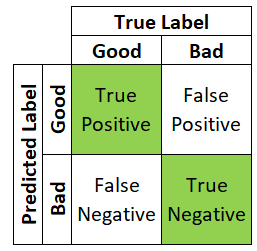

Which of the following performance metric should we employ in order to select the best model? (You can use the table above) Please write down the correct answer below (under **YOUR ANSWER HERE**) and explain your reasoning in one or two sentences.

1.   Accuracy
2.   Precision
3.   Recall

### YOUR ANSWER HERE:
*  Being one of the most common classification metrics, accuracy is very intuitive and easy to understand and implement: It ranges from 0 to 100 percent or 0 to 1. If you deal with simple modeling cases, accuracy may be helpful. Besides, you can find it within any ML library like Scikit-learn for any classification model with a score method.
* * If the dataset is imbalanced(the classes in a set are presented unevenly), the result won't be something you can trust

* Recall shall be the model metric we use to select our best model when there is a high cost associated with False Negative.

* Precision does well in cases when you need to or can avoid False Negatives but can’t ignore False Positives. A typical example of this is a spam detector model. It’s kind of okay if the model sends a couple of spam letters to the inbox, but sending an important non-spam email to the spam folder (False Positive) is much worse.


We choose to use Precision because it is better on giving importance to False Positive cases. Because bank want to minimize the number of credits that are called good but actually a bad. Precision is better at this job. We can take action for our model by looking Precision. Precision = True Positive / (True Positives + False Positives)

##**8) Train a decision tree classifier on train data and do model selection using the validation data** *(30 pts)*

* Set number of folds in cross validation as 5 *(5 pts)*
* Set scoring parameter to what you have determined in the last question as `scoring = '...'` *(5 pts)*
* Use grid_search to apply hyperparameter tuning on decision tree classifier with max_depth = 3, 5, 7, 9, 11 *(10 pts)*
* Plot the validation set performance metrics for these settings where x axis denotes the k values and validation performance metrics are on y axis. *(10 pts)*

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined a

DecisionTreeClassifier(criterion='entropy', max_depth=5)
0.47155893766674756


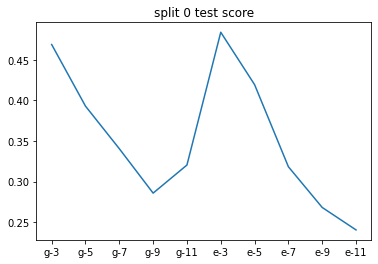

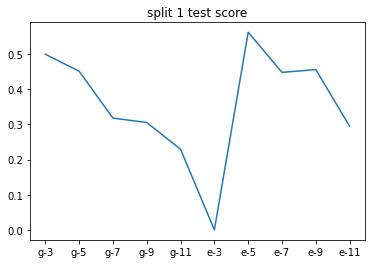

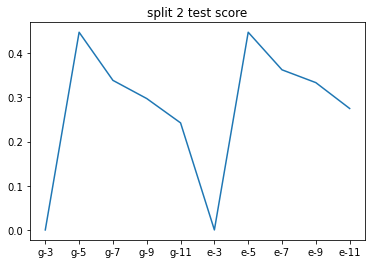

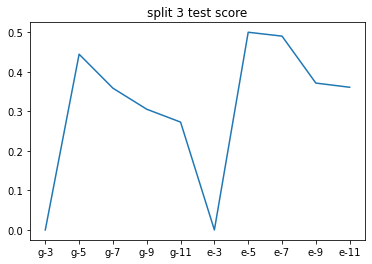

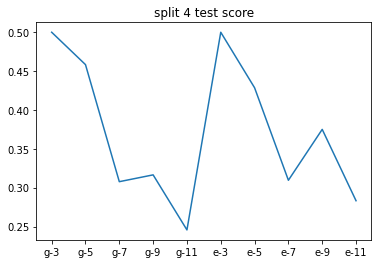

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Train decision tree classifiers

clf= DecisionTreeClassifier()
# clf.fit(X_train, y_train)

# y_pred = clf.predict(X_test)

# print(accuracy_score(y_test,y_pred))




param_dist = {
    "criterion":["gini", "entropy"],
    "max_depth":[3, 5, 7, 9, 11]
  
}

grid = GridSearchCV(clf,
                    param_grid=param_dist,
                    cv=5,
                    scoring='precision',
                    return_train_score=False, 
                    verbose=1, 
                    refit=True)
grid.fit(X_train, y_train)
#print()
print(grid.best_estimator_)
print(grid.best_score_)
# print(grid.cv_results_ )
# print(grid.cv_results_['split0_test_score'])

#split 0 test score
xpoints= np.array(["g-3","g-5","g-7","g-9","g-11","e-3","e-5", "e-7", "e-9","e-11"])
ypoints = np.array(grid.cv_results_['split0_test_score'])
plt.plot(xpoints,ypoints)
plt.title("split 0 test score")
plt.show()

#split 1 test score
xpoints= np.array(["g-3","g-5","g-7","g-9","g-11","e-3","e-5", "e-7", "e-9","e-11"])
ypoints = np.array(grid.cv_results_['split1_test_score'])
plt.plot(xpoints,ypoints)
plt.title("split 1 test score")
plt.show()

#split 1 test score
xpoints= np.array(["g-3","g-5","g-7","g-9","g-11","e-3","e-5", "e-7", "e-9","e-11"])
ypoints = np.array(grid.cv_results_['split2_test_score'])
plt.plot(xpoints,ypoints)
plt.title("split 2 test score")
plt.show()

#split 1 test score
xpoints= np.array(["g-3","g-5","g-7","g-9","g-11","e-3","e-5", "e-7", "e-9","e-11"])
ypoints = np.array(grid.cv_results_['split3_test_score'])
plt.plot(xpoints,ypoints)
plt.title("split 3 test score")
plt.show()


#split 1 test score
xpoints= np.array(["g-3","g-5","g-7","g-9","g-11","e-3","e-5", "e-7", "e-9","e-11"])
ypoints = np.array(grid.cv_results_['split4_test_score'])
plt.plot(xpoints,ypoints)
plt.title("split 4 test score")
plt.show()






# Plot errors






##**9) Evaluate the Best Classifier on Test Set** *(15 pts)*

- Predict the labels of testing data. **Note that grid search cv function will return you the best estimator, so you can use directly the fitted function to make your predictions** and report the accuracy. 

In [11]:
# test prediction using a decision tree with all default parameters and ..... min-split value 



clf_best = grid.best_estimator_
clf_best.fit(X_train, y_train)
y_pred = clf_best.predict(X_test)

# Report your accuracy
from sklearn.metrics import precision_score, accuracy_score # you can find your scoring metric in this library

acc = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)

print("Accuracy score of the best model is:", acc)
print("Precision score of the best model is:", precision)



Accuracy score of the best model is: 0.7639097744360902
Precision score of the best model is: 0.5217391304347826


##**10) Submission**

Name this notebook as: **YourName_Surname_hw1.ipynb** from the top left corner (e.g. for Özgür Can Seçkin -> Ozgur_Can_Seckin_hw1.ipynb)
Next, download this notebook as a *.ipynb document and upload* it on SuCourse. 


## Questions? 

You can and should ask all your Google Colab related questions under Forums  and feel free to answer/share your answer regarding Colab. 

You can also ask/answer about which functions to use and what libraries... 

However you should **not ask** about the core parts, that is what is validation/test, which one shd. have higher performance, what are your scores etc.
